In [227]:
import models.CNN.model as CNN
import importlib
import numpy as np
import argparse
from pathlib import Path
import torch
import json
from models.hyperparams import ImageType, LearningRule, WeightScale, Inhibition, oneHotEncode
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import models.learning as L

transform = transforms.Compose(
    [transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

Files already downloaded and verified
Files already downloaded and verified


In [137]:
def view(h1):
    ac1 = h1.squeeze().detach().to('cpu')
    print(ac1.shape)
    nbe = int(math.ceil(math.sqrt(ac1.size(0))))


    fig, axes = plt.subplots(nbe, nbe, figsize=(20,20))
    for i, ax in enumerate(axes.flat):
        if i > ac1.size(0)-1:
            break
        ax.imshow(ac1[i])
    plt.show()

In [138]:
inp, lab = next(iter(test_dataloader))
image = inp[0].permute(1,2,0)
label = lab[0]
input1 = inp[0].unsqueeze(0)

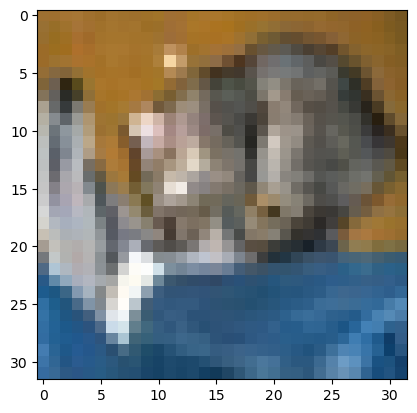

In [139]:
plt.imshow(image)

In [228]:
topdown = False

In [13]:
import importlib

In [278]:
importlib.reload(L)
importlib.reload(CNN)

<module 'models.CNN.model' from '/Users/zhaoyizhe/Documents/GitHub/biological-deep-learning/models/CNN/model.py'>

In [274]:
with open("oneconfig.json", "r") as file:
        config = json.load(file)

In [279]:
mymodelCNN = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.No, LearningRule.SoftHebb, Inhibition.RePU, 'cpu', 10)
mymodelCNN, mymodel = CNN.CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'), greedytrain=True)
# print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
#                                 topdown=topdown))

New Image Dimensions after Convolution : (64, 16, 16)
Fully connected layer input dim : 16384


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [280]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.4315, {3: (377, 1000, 900), 8: (605, 1000, 384), 0: (337, 1000, 175), 6: (286, 1000, 179), 4: (506, 1000, 1196), 1: (704, 1000, 912), 5: (205, 1000, 296), 9: (439, 1000, 400), 7: (534, 1000, 667), 2: (322, 1000, 576)})


### Gradient Classifier Head

In [135]:
with open("modelconfig.json", "r") as file:
        config = json.load(file)

In [136]:
mymodelCNN = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.No, LearningRule.SoftHebb, Inhibition.Softmax, 'cpu', 10)
mymodelCNN, mymodel = CNN.CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'), greedytrain=True)
# print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
#                                 topdown=topdown))

New Image Dimensions after Convolution : (32, 16, 16)
New Image Dimensions after Convolution : (128, 8, 8)
New Image Dimensions after Convolution : (512, 4, 4)
Fully connected layer input dim : 8192


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

In [146]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.4352, {3: (404, 1000, 976), 8: (723, 1000, 950), 0: (350, 1000, 170), 6: (576, 1000, 862), 1: (507, 1000, 441), 4: (292, 1000, 420), 5: (379, 1000, 359), 9: (449, 1000, 583), 7: (539, 1000, 744), 2: (133, 1000, 143)})


In [157]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

torch.Size([32, 16, 16])


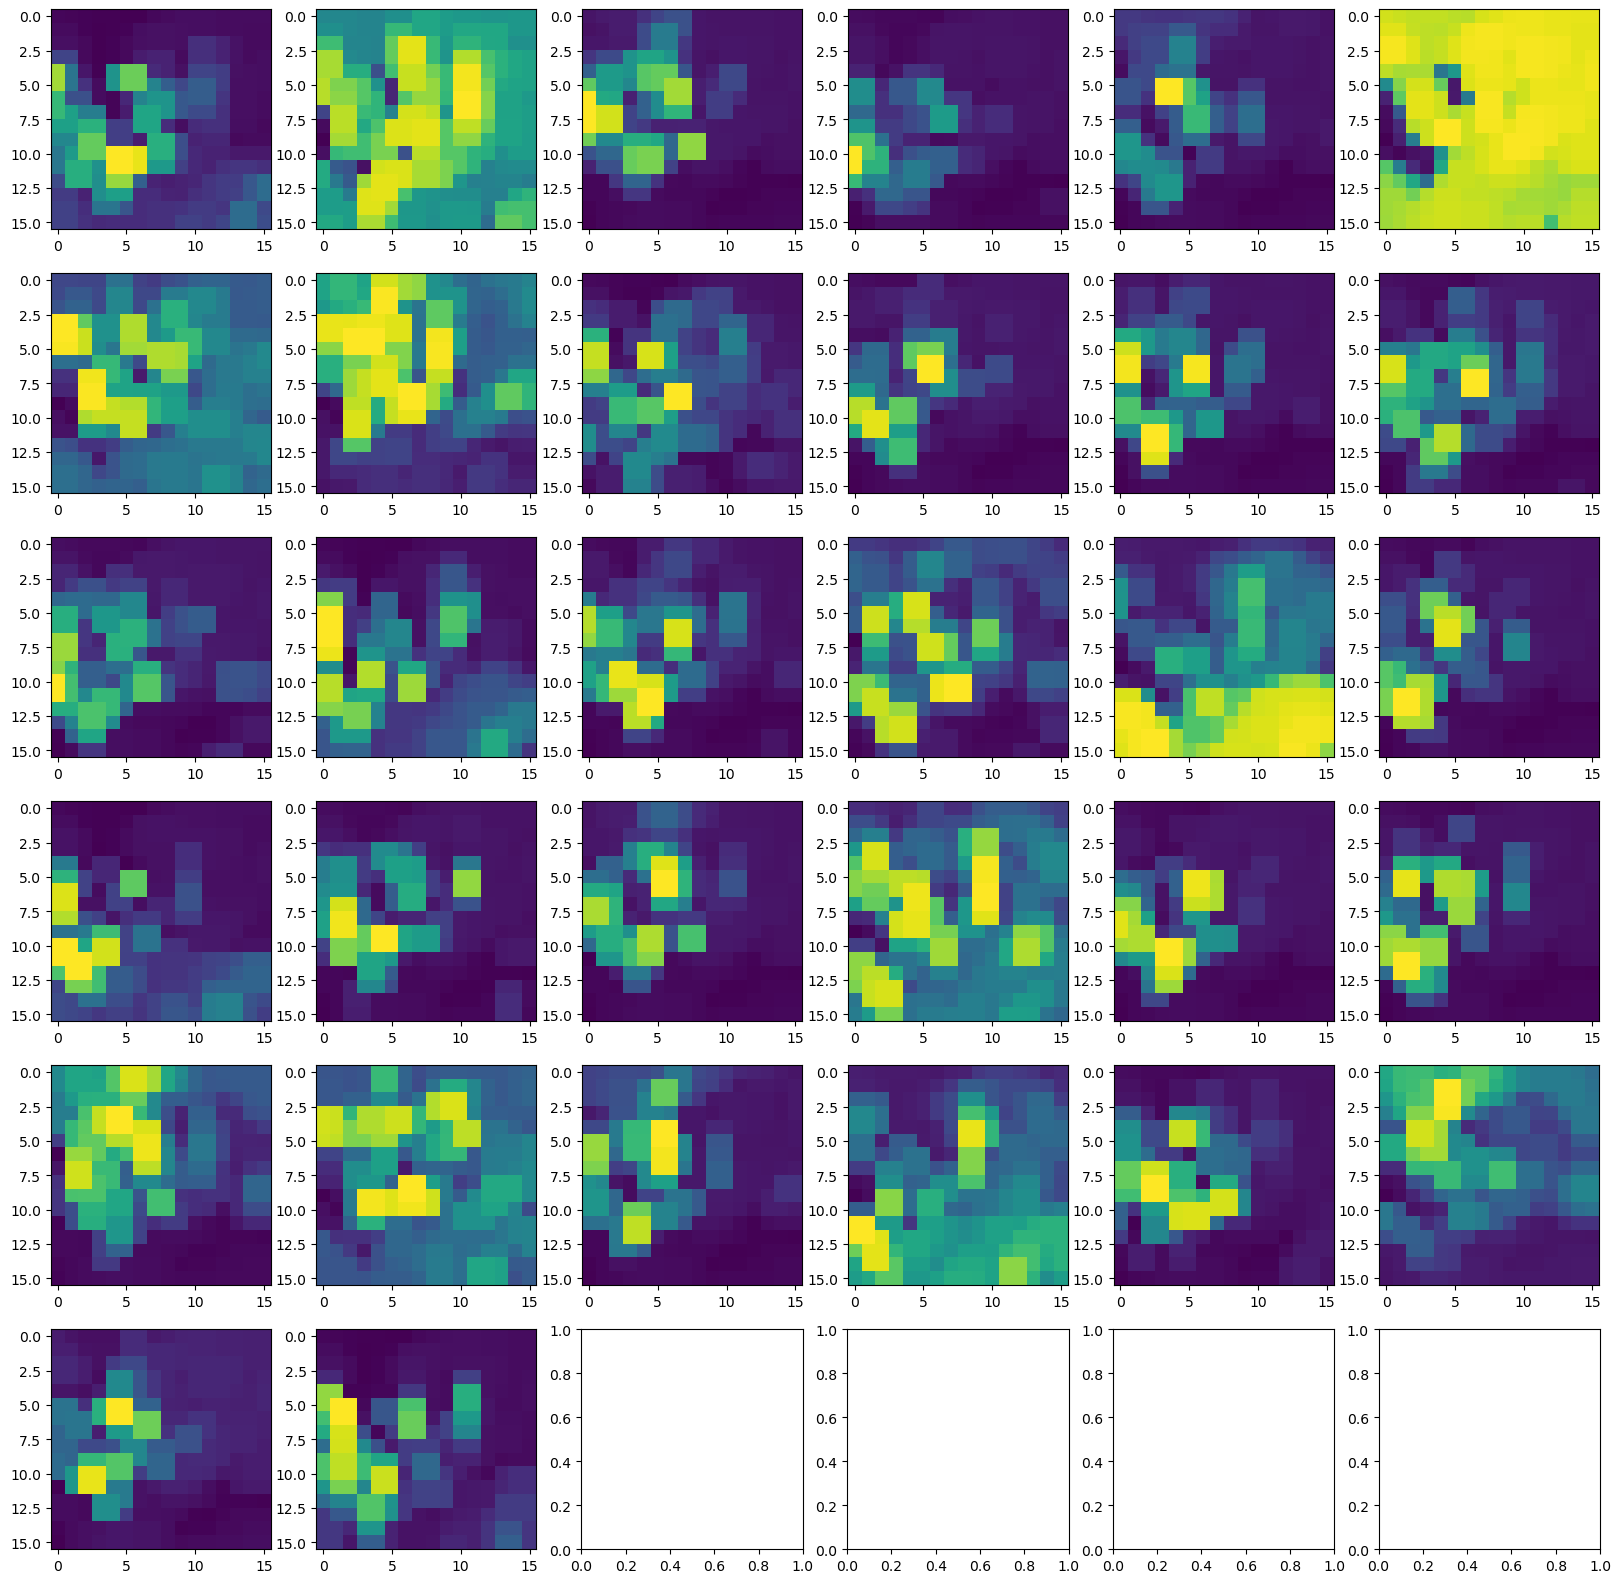

In [158]:
view(o1)

torch.Size([128, 8, 8])


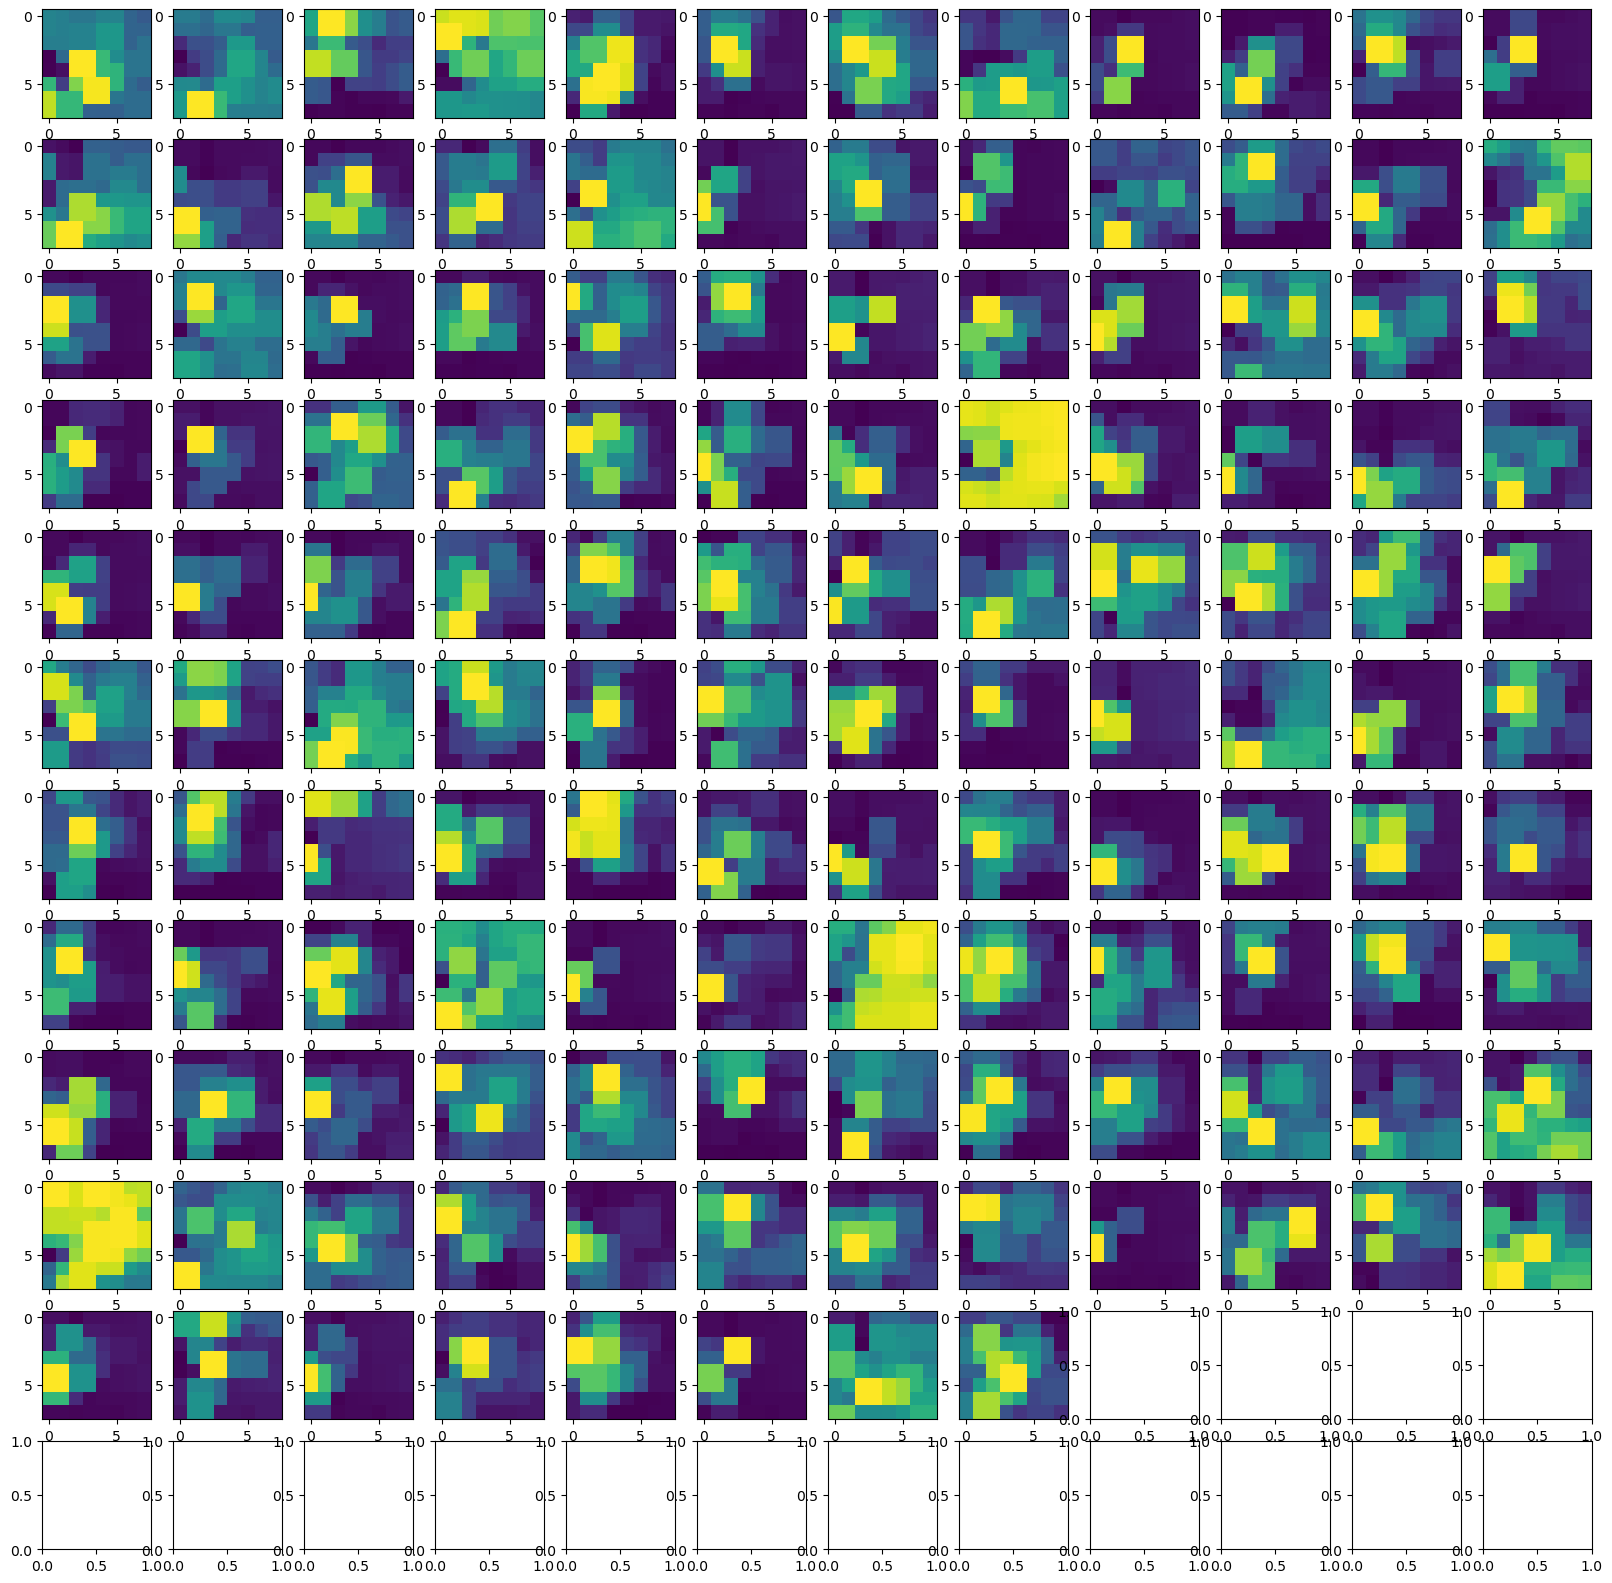

In [144]:
view(o2)

torch.Size([512, 4, 4])


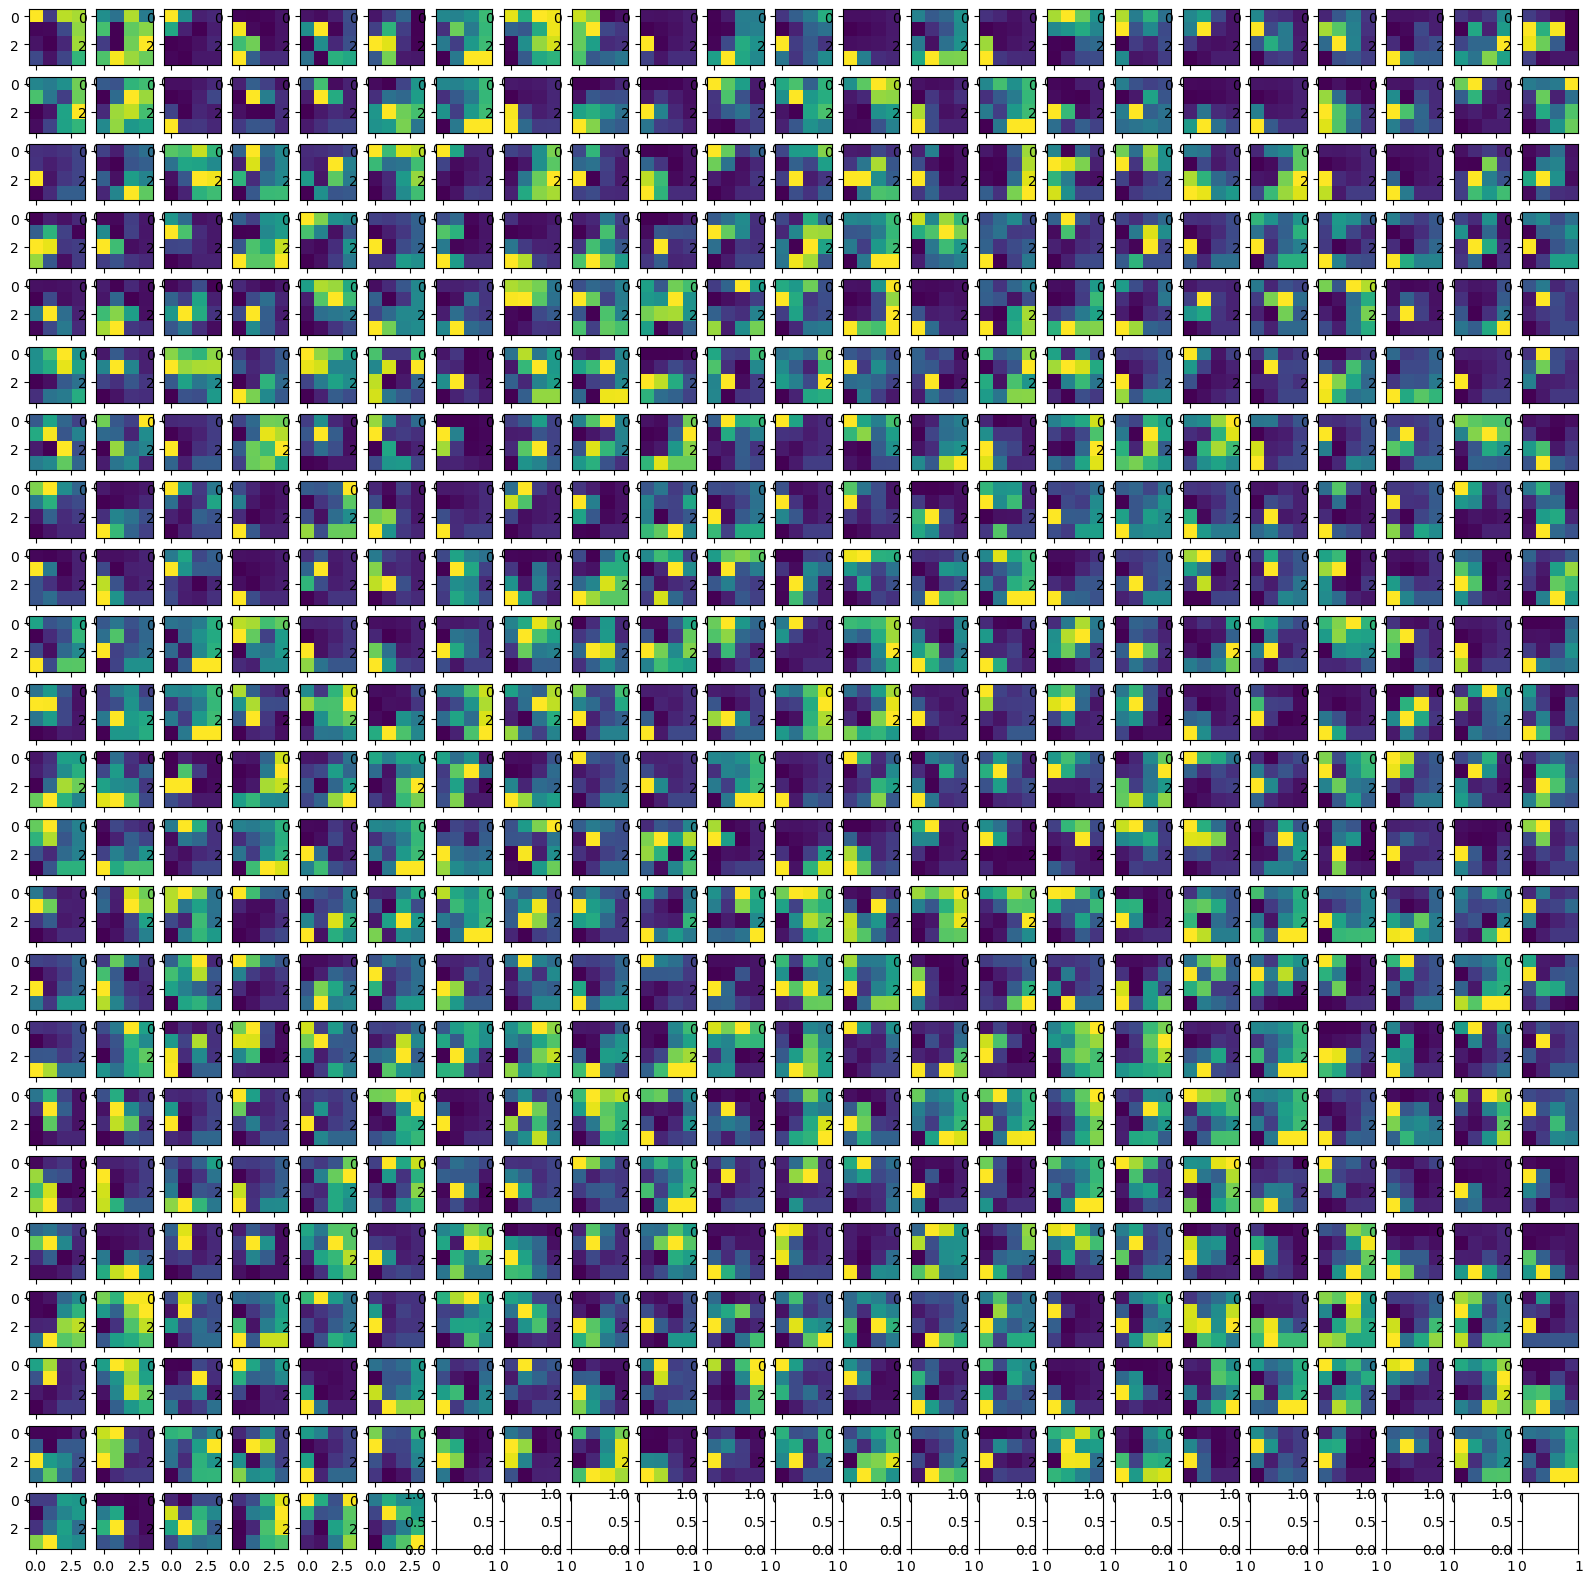

In [145]:
view(o3)

### Hebbian Head

In [187]:
myHebbmodel = CNN.Hebbian_Classifier(8192, 10, 'cpu', mymodelCNN, 0.005)

In [188]:
for _ in range(50):
    for data in tqdm(test_dataloader):
        inputs, label = data
        myHebbmodel.train_classifier(inputs, oneHotEncode(label, 10, 'cpu'))

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [189]:
print(CNN.CNN_Baseline_test(mymodel=myHebbmodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.2927, {3: (22, 1000, 51), 6: (526, 1000, 1643), 8: (474, 1000, 825), 0: (570, 1000, 1467), 1: (245, 1000, 447), 4: (330, 1000, 1227), 5: (305, 1000, 600), 9: (322, 1000, 623), 7: (131, 1000, 188), 2: (2, 1000, 2)})


### Gradient 64 - 256 - 1024 channels

In [215]:
with open("fourconfig.json", "r") as file:
        config = json.load(file)

In [216]:
mymodelCNN = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.No, LearningRule.SoftHebb, Inhibition.Softmax, 'cpu', 10)
mymodelCNN, mymodel = CNN.CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'), greedytrain=True)
# print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
#                                 topdown=topdown))

New Image Dimensions after Convolution : (32, 16, 16)
New Image Dimensions after Convolution : (128, 8, 8)
New Image Dimensions after Convolution : (512, 4, 4)
New Image Dimensions after Convolution : (2048, 2, 2)
Fully connected layer input dim : 8192


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

#### 4 layers

In [218]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.37, {3: (246, 1000, 725), 8: (607, 1000, 746), 0: (411, 1000, 332), 6: (617, 1000, 1487), 1: (451, 1000, 726), 5: (388, 1000, 650), 9: (413, 1000, 764), 7: (368, 1000, 566), 4: (158, 1000, 258), 2: (41, 1000, 46)})


In [219]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)
u4, o4 = mymodelCNN.layers['CNNLayer4'].forward(o3, None, False)

/Users/zhaoyizhe/miniconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


torch.Size([32, 16, 16])


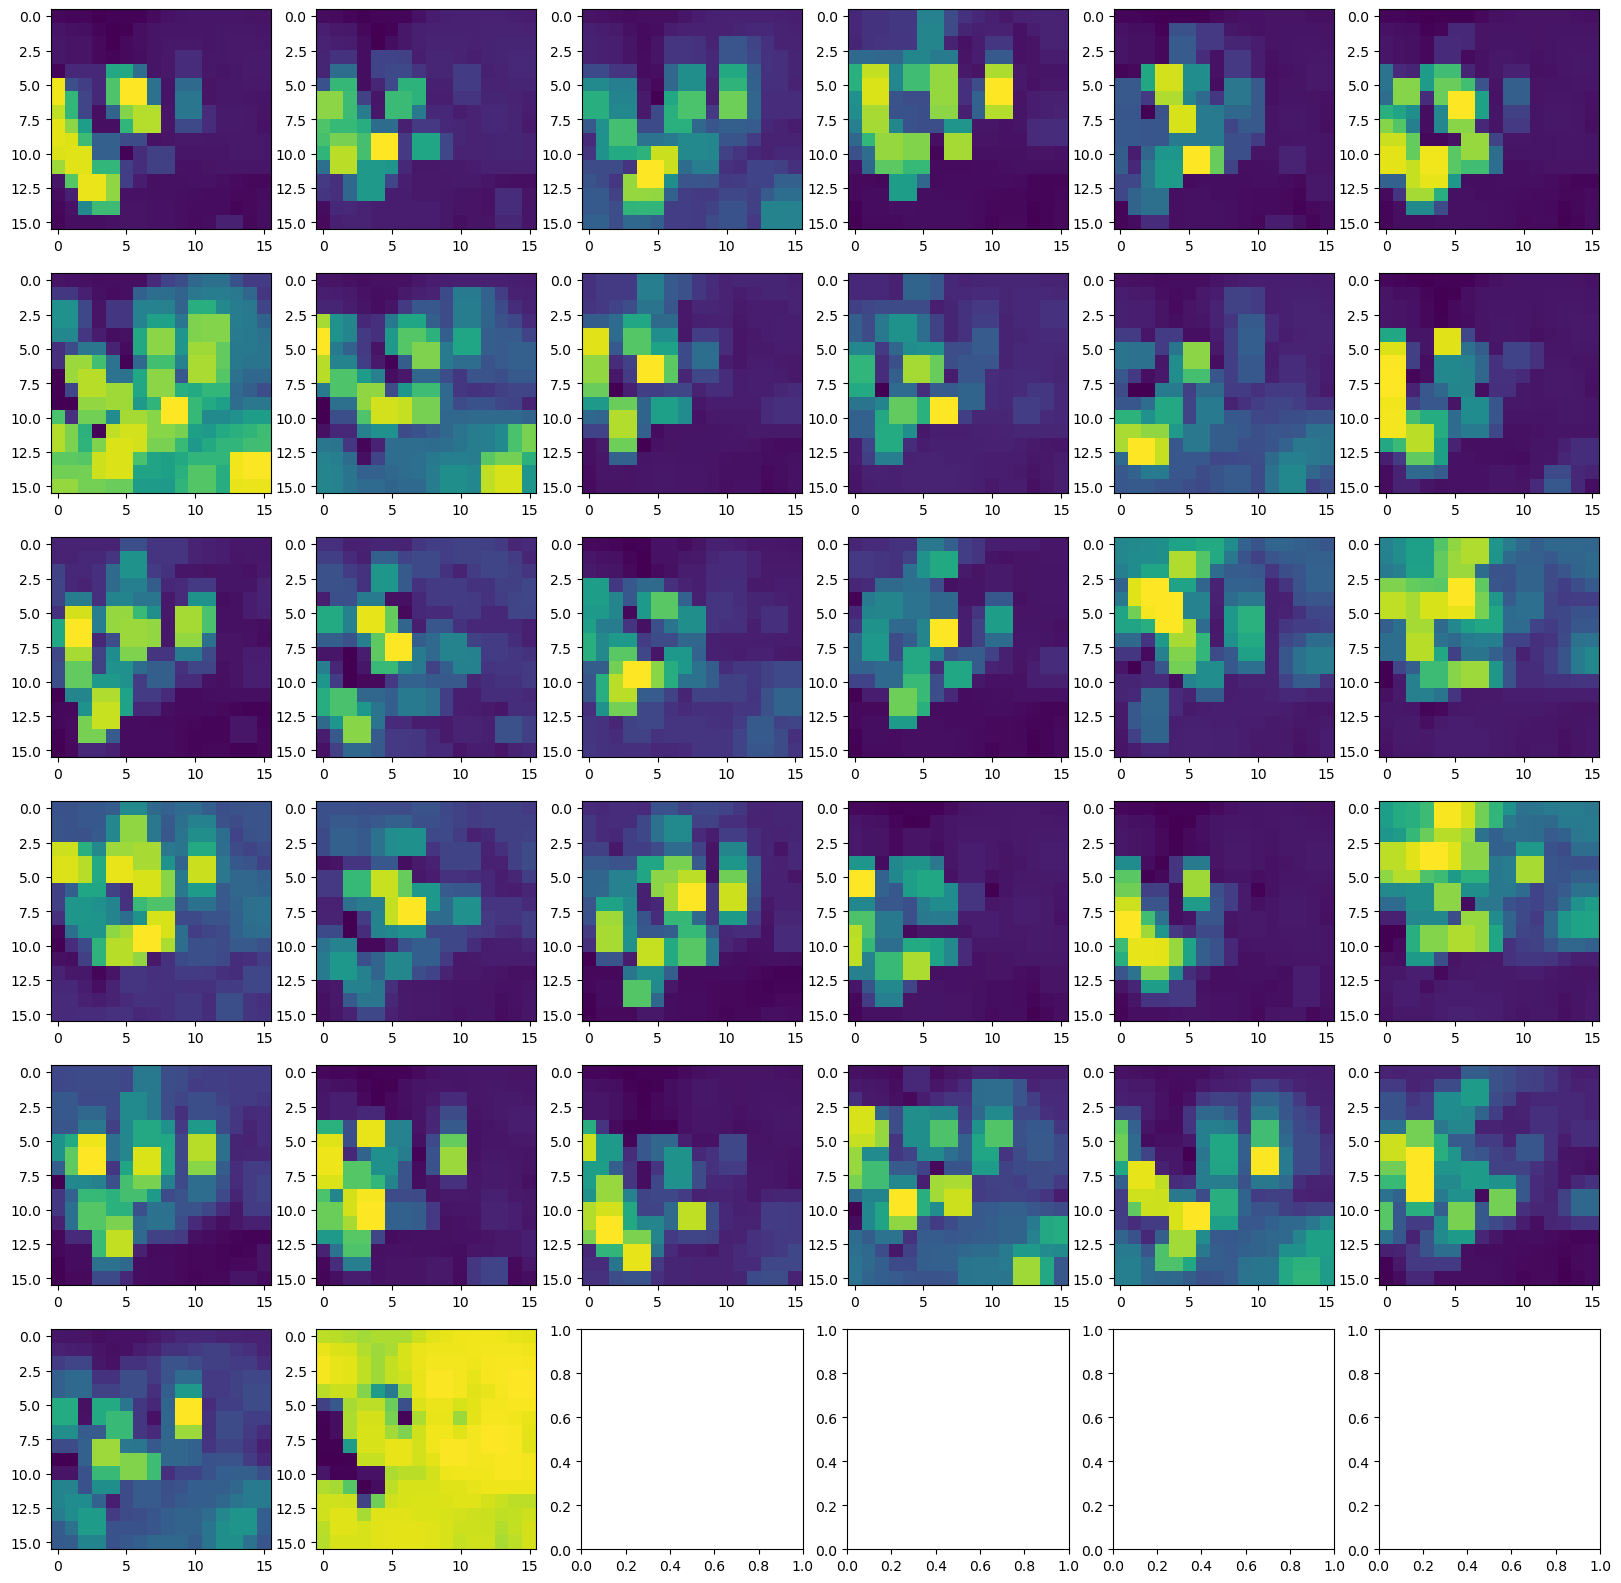

torch.Size([128, 8, 8])


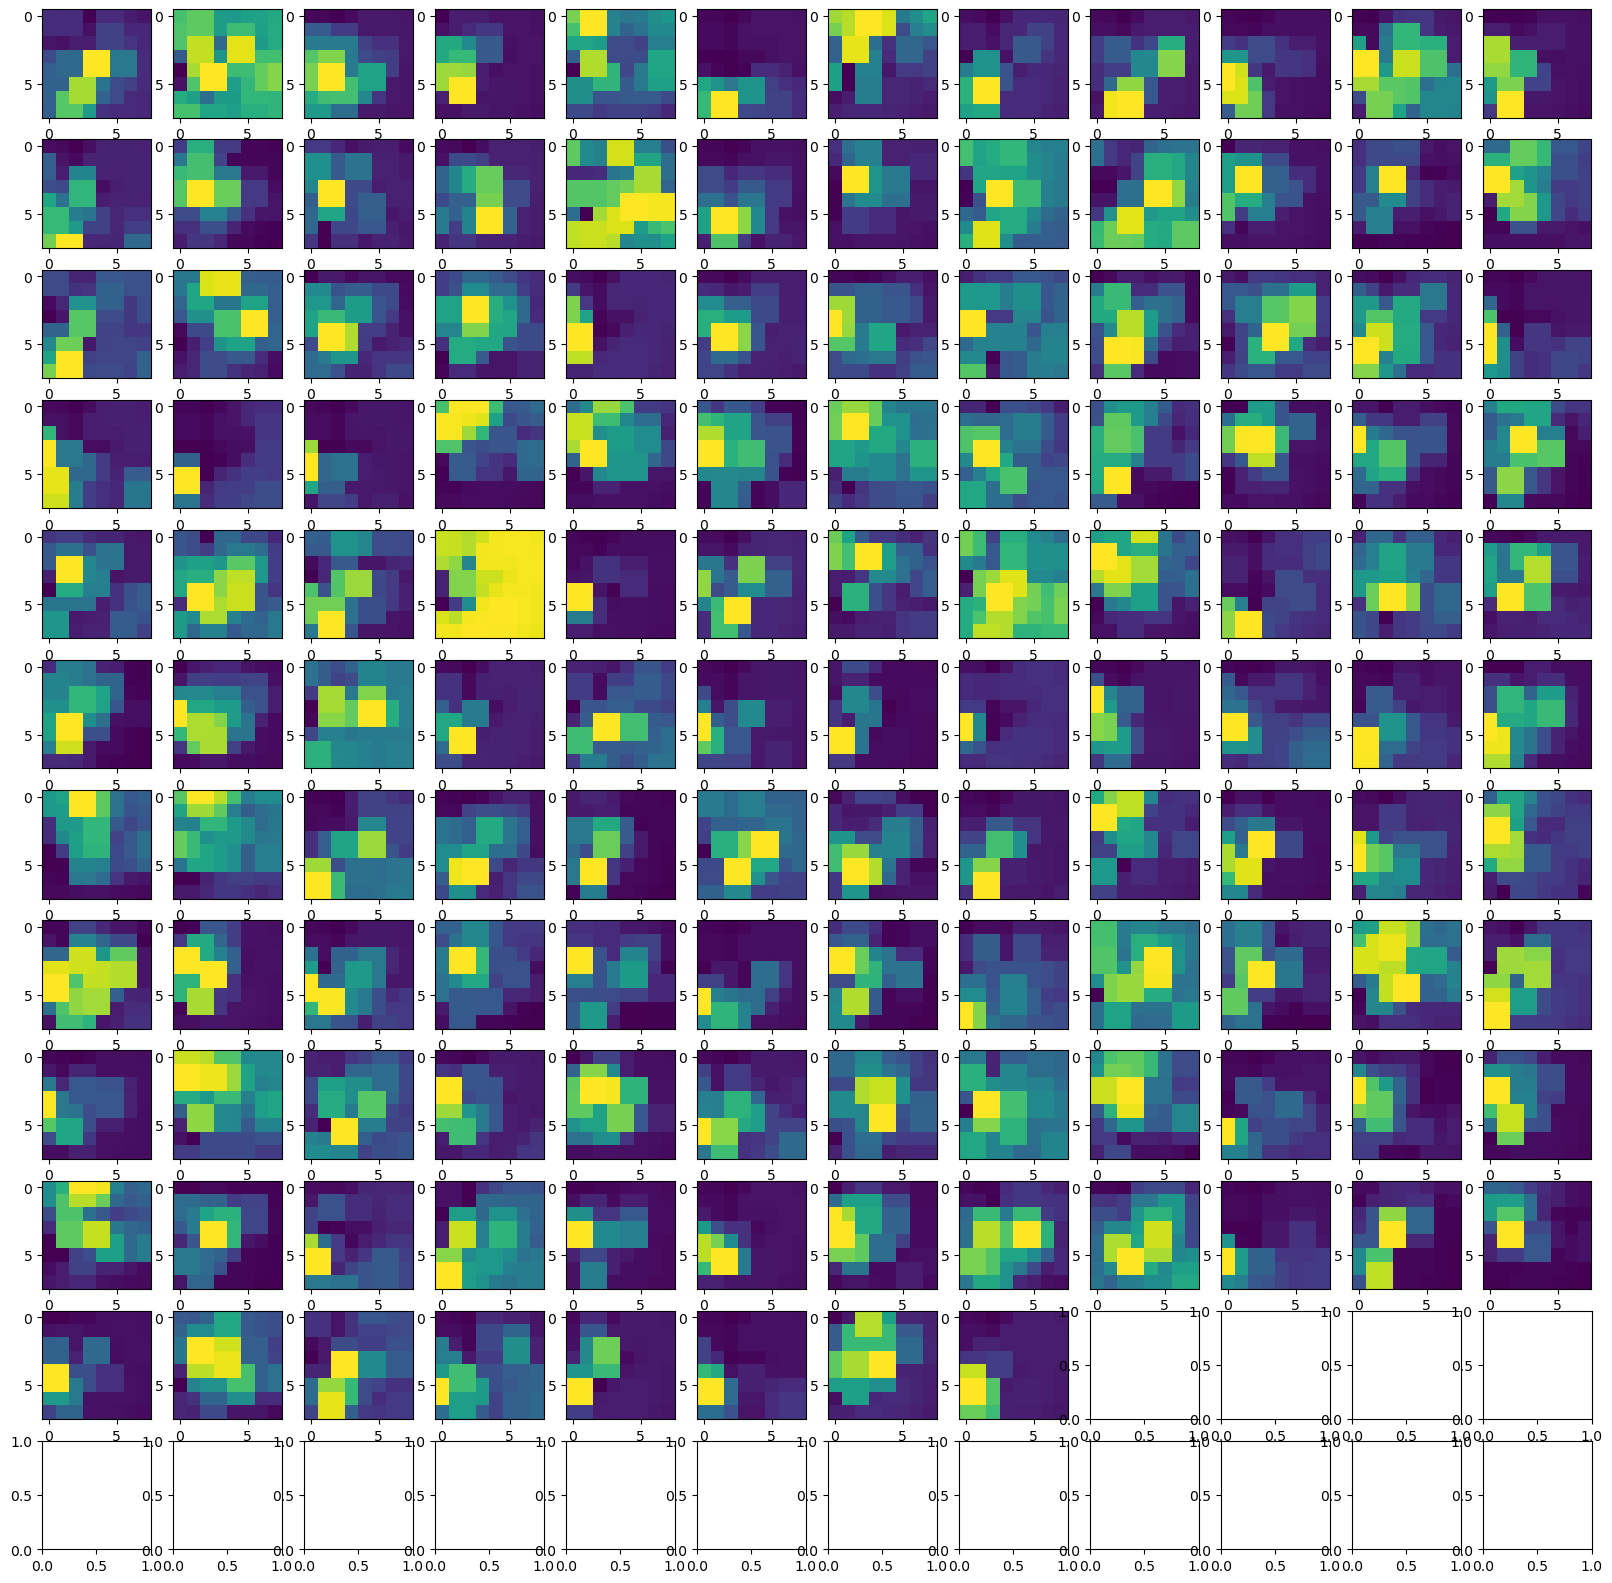

torch.Size([512, 4, 4])


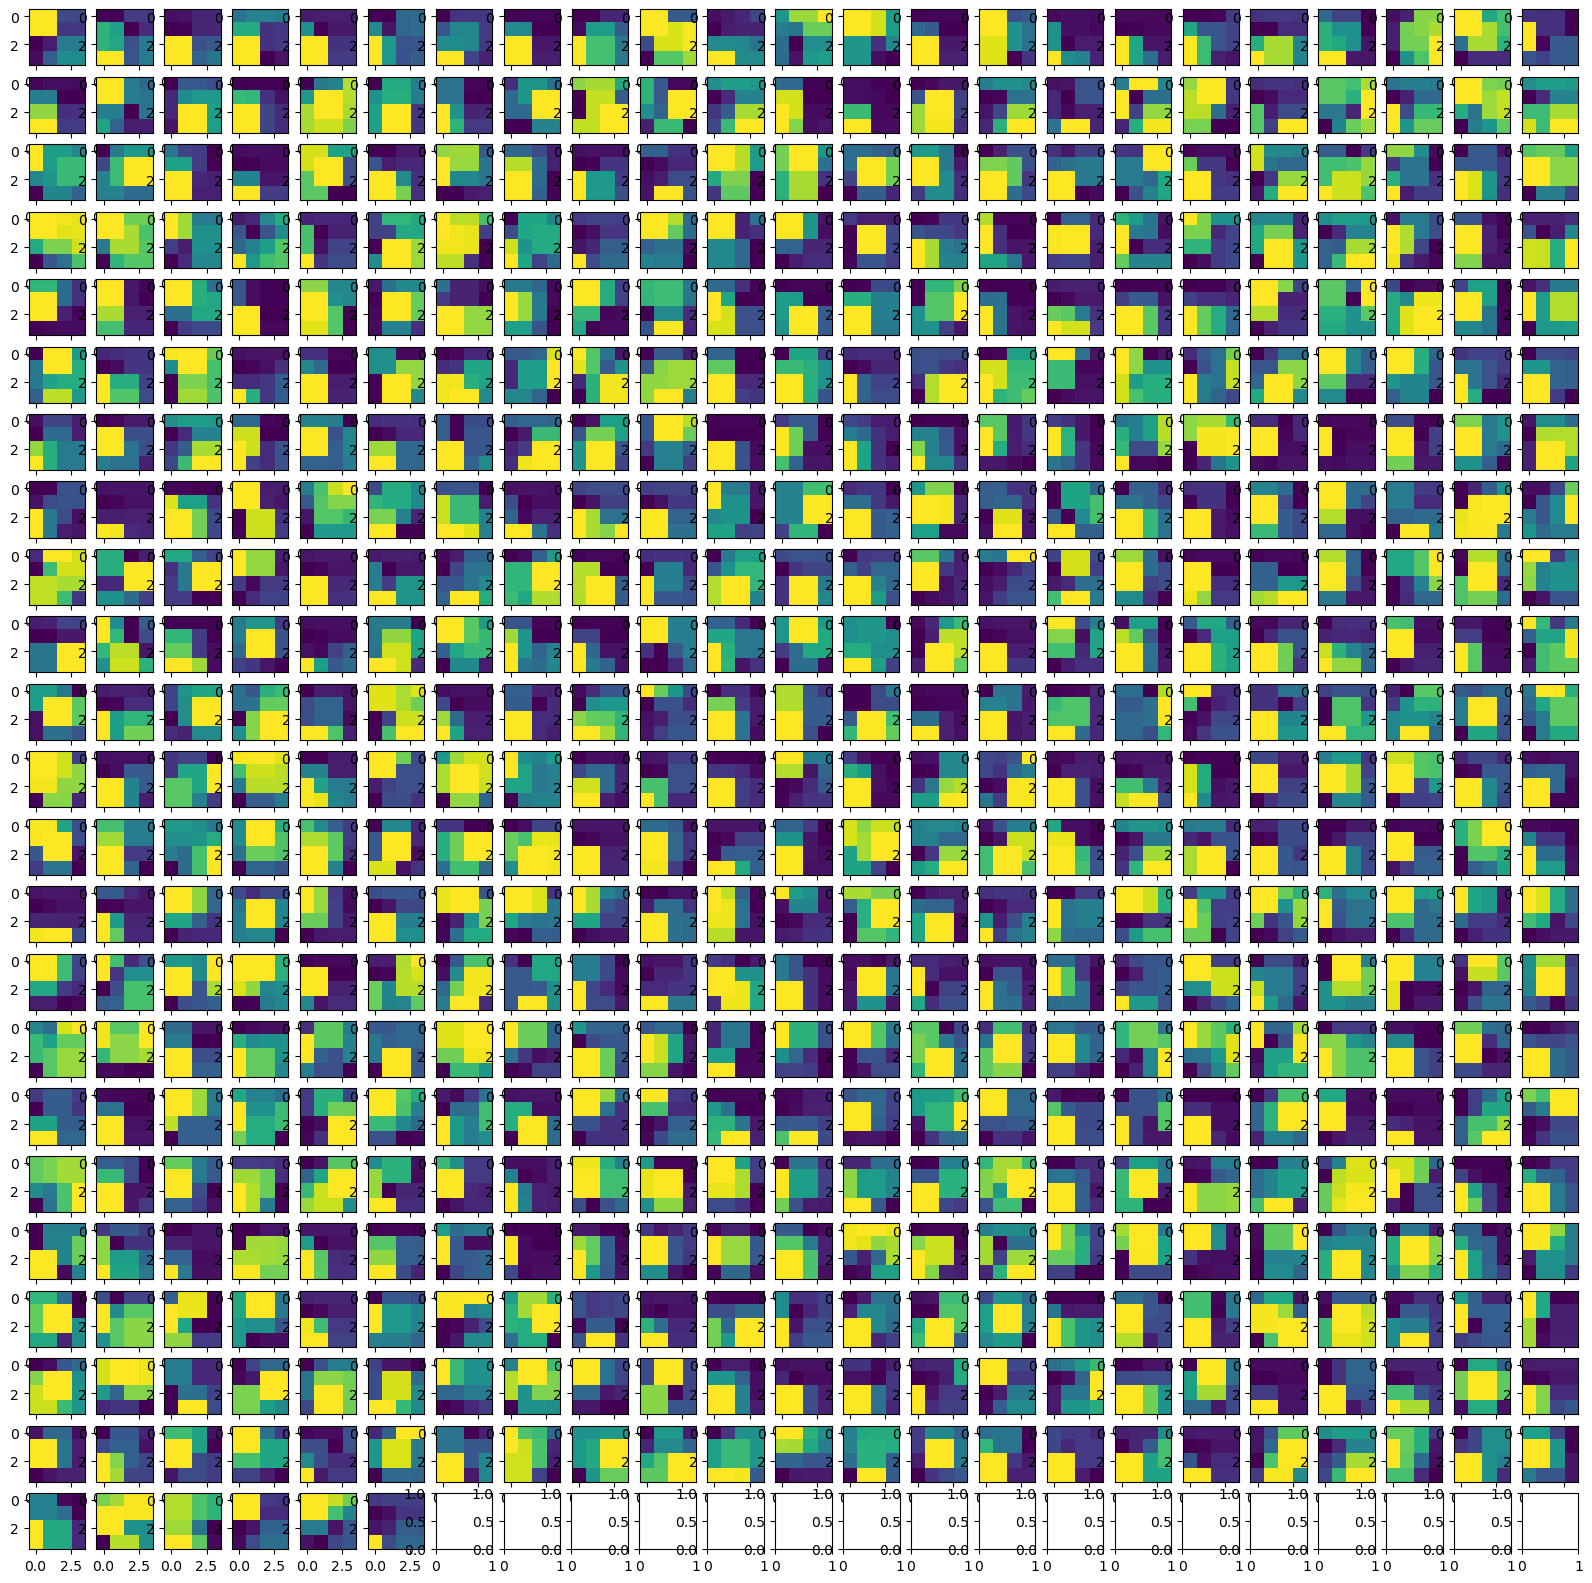

torch.Size([2048, 2, 2])


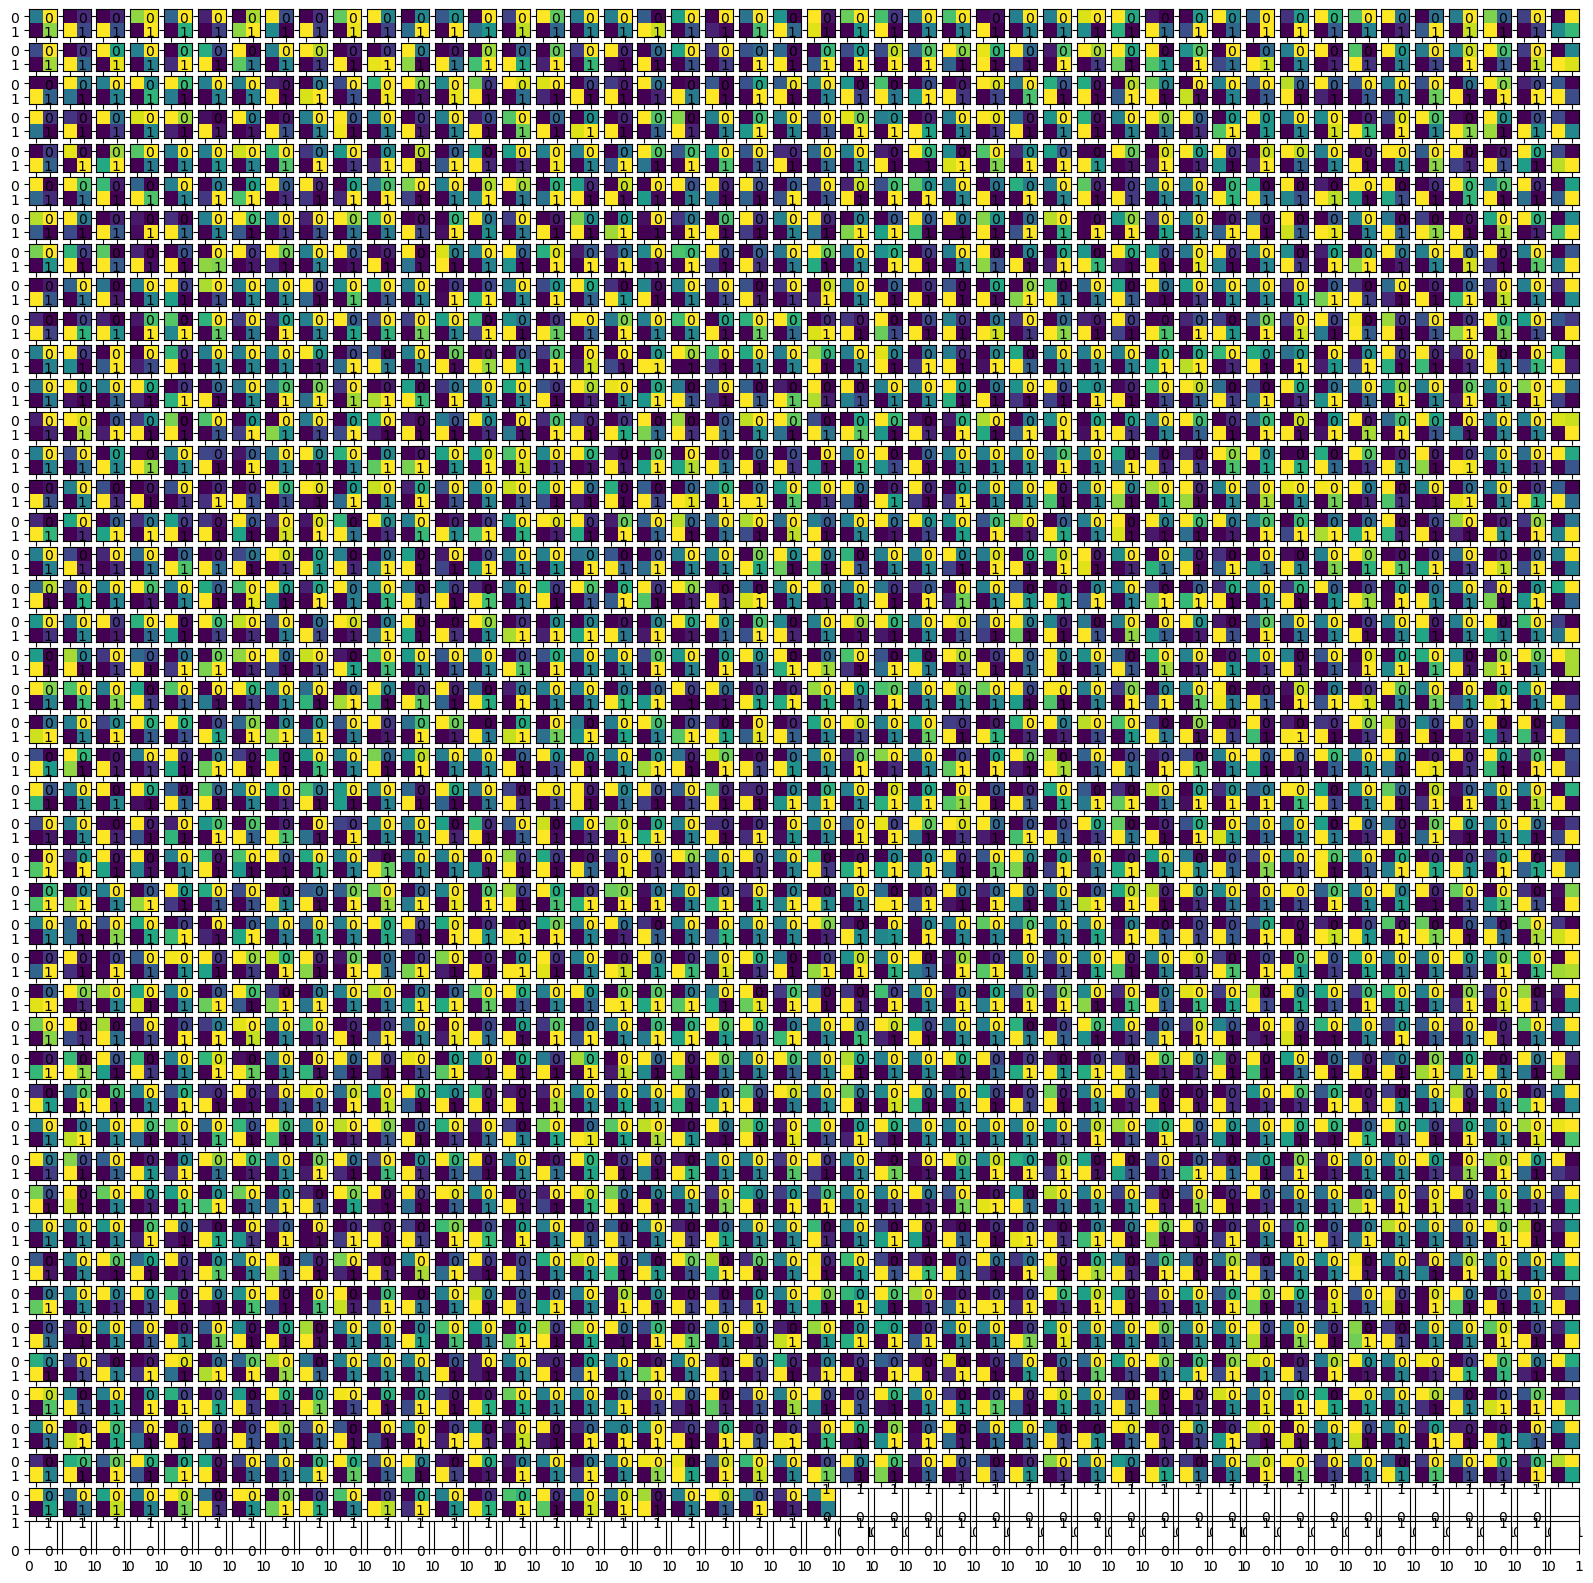

In [220]:
view(o1)
view(o2)
view(o3)
view(o4)

#### 2 layers

In [200]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.5278, {3: (500, 1000, 885), 8: (787, 1000, 781), 0: (396, 1000, 130), 6: (651, 1000, 521), 1: (646, 1000, 393), 4: (485, 1000, 643), 5: (342, 1000, 209), 9: (529, 1000, 354), 7: (611, 1000, 469), 2: (331, 1000, 337)})


In [203]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)

torch.Size([64, 16, 16])


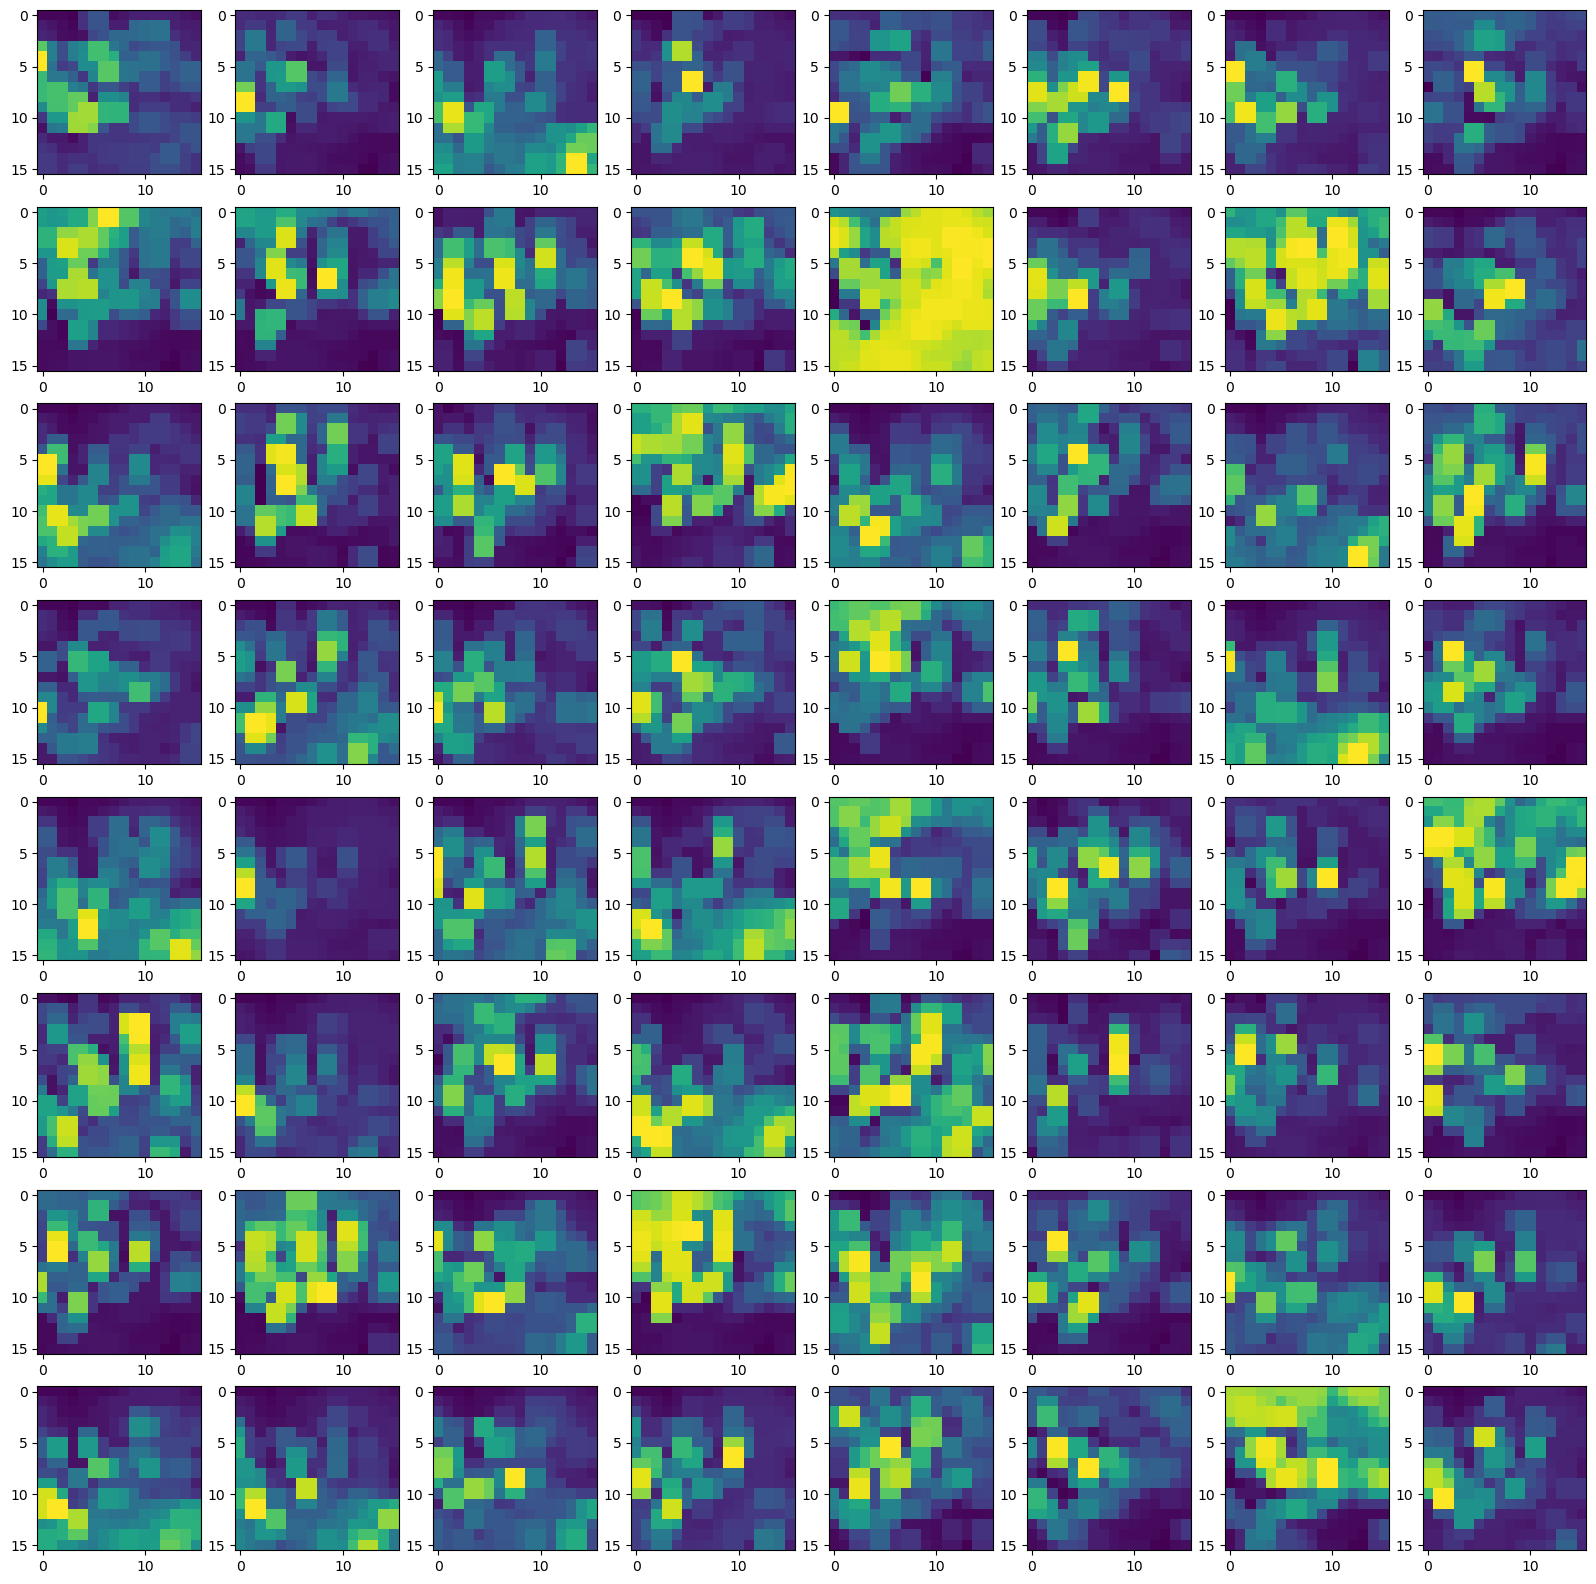

torch.Size([256, 8, 8])


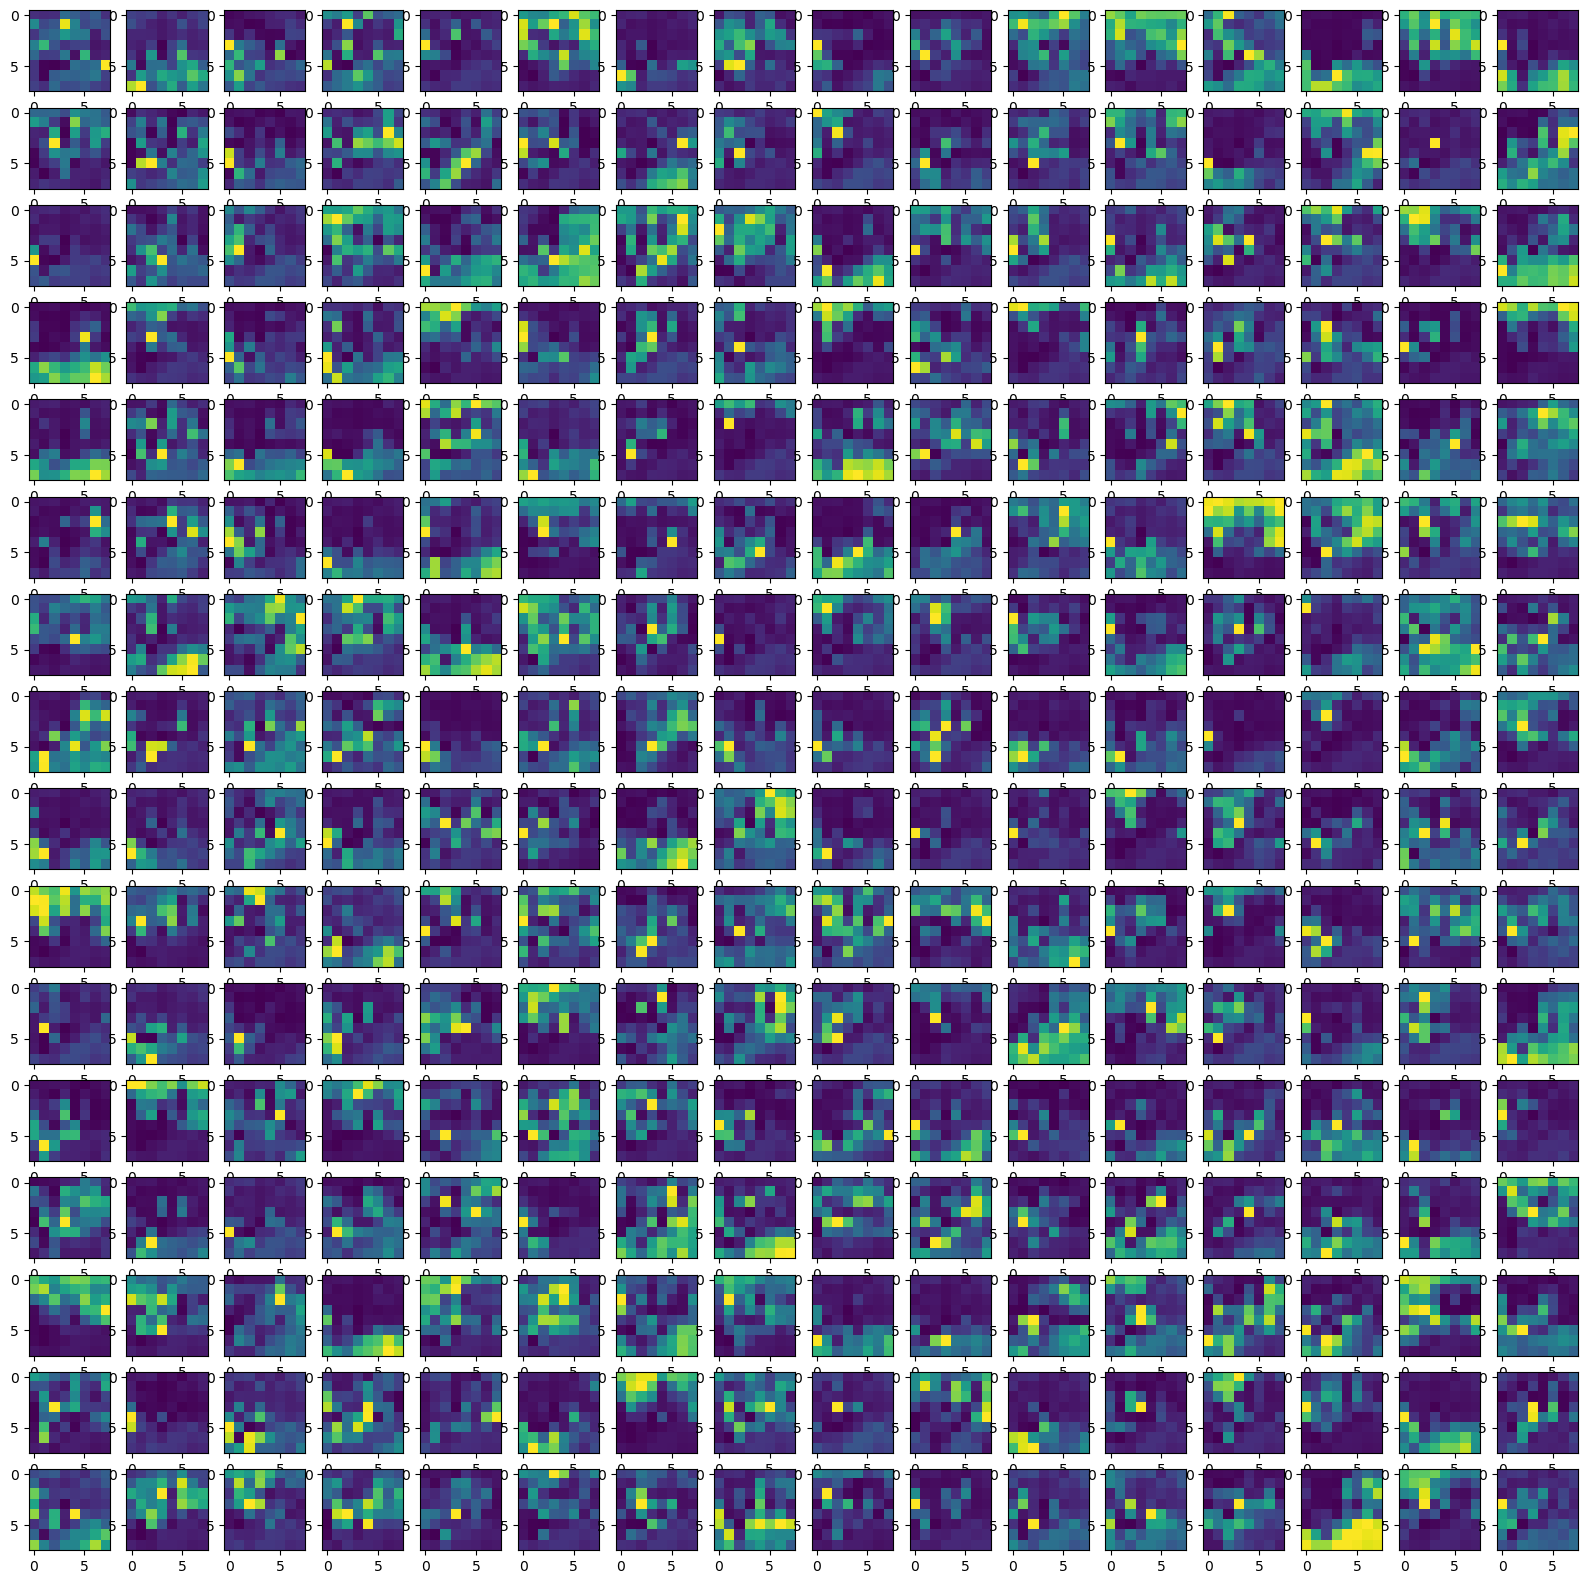

In [204]:
view(o1)
view(o2)

#### 3 layers

In [193]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.5062, {3: (503, 1000, 988), 8: (741, 1000, 662), 0: (450, 1000, 236), 6: (662, 1000, 665), 1: (635, 1000, 502), 5: (412, 1000, 391), 9: (521, 1000, 464), 7: (580, 1000, 525), 4: (300, 1000, 256), 2: (258, 1000, 249)})


In [194]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

torch.Size([64, 16, 16])


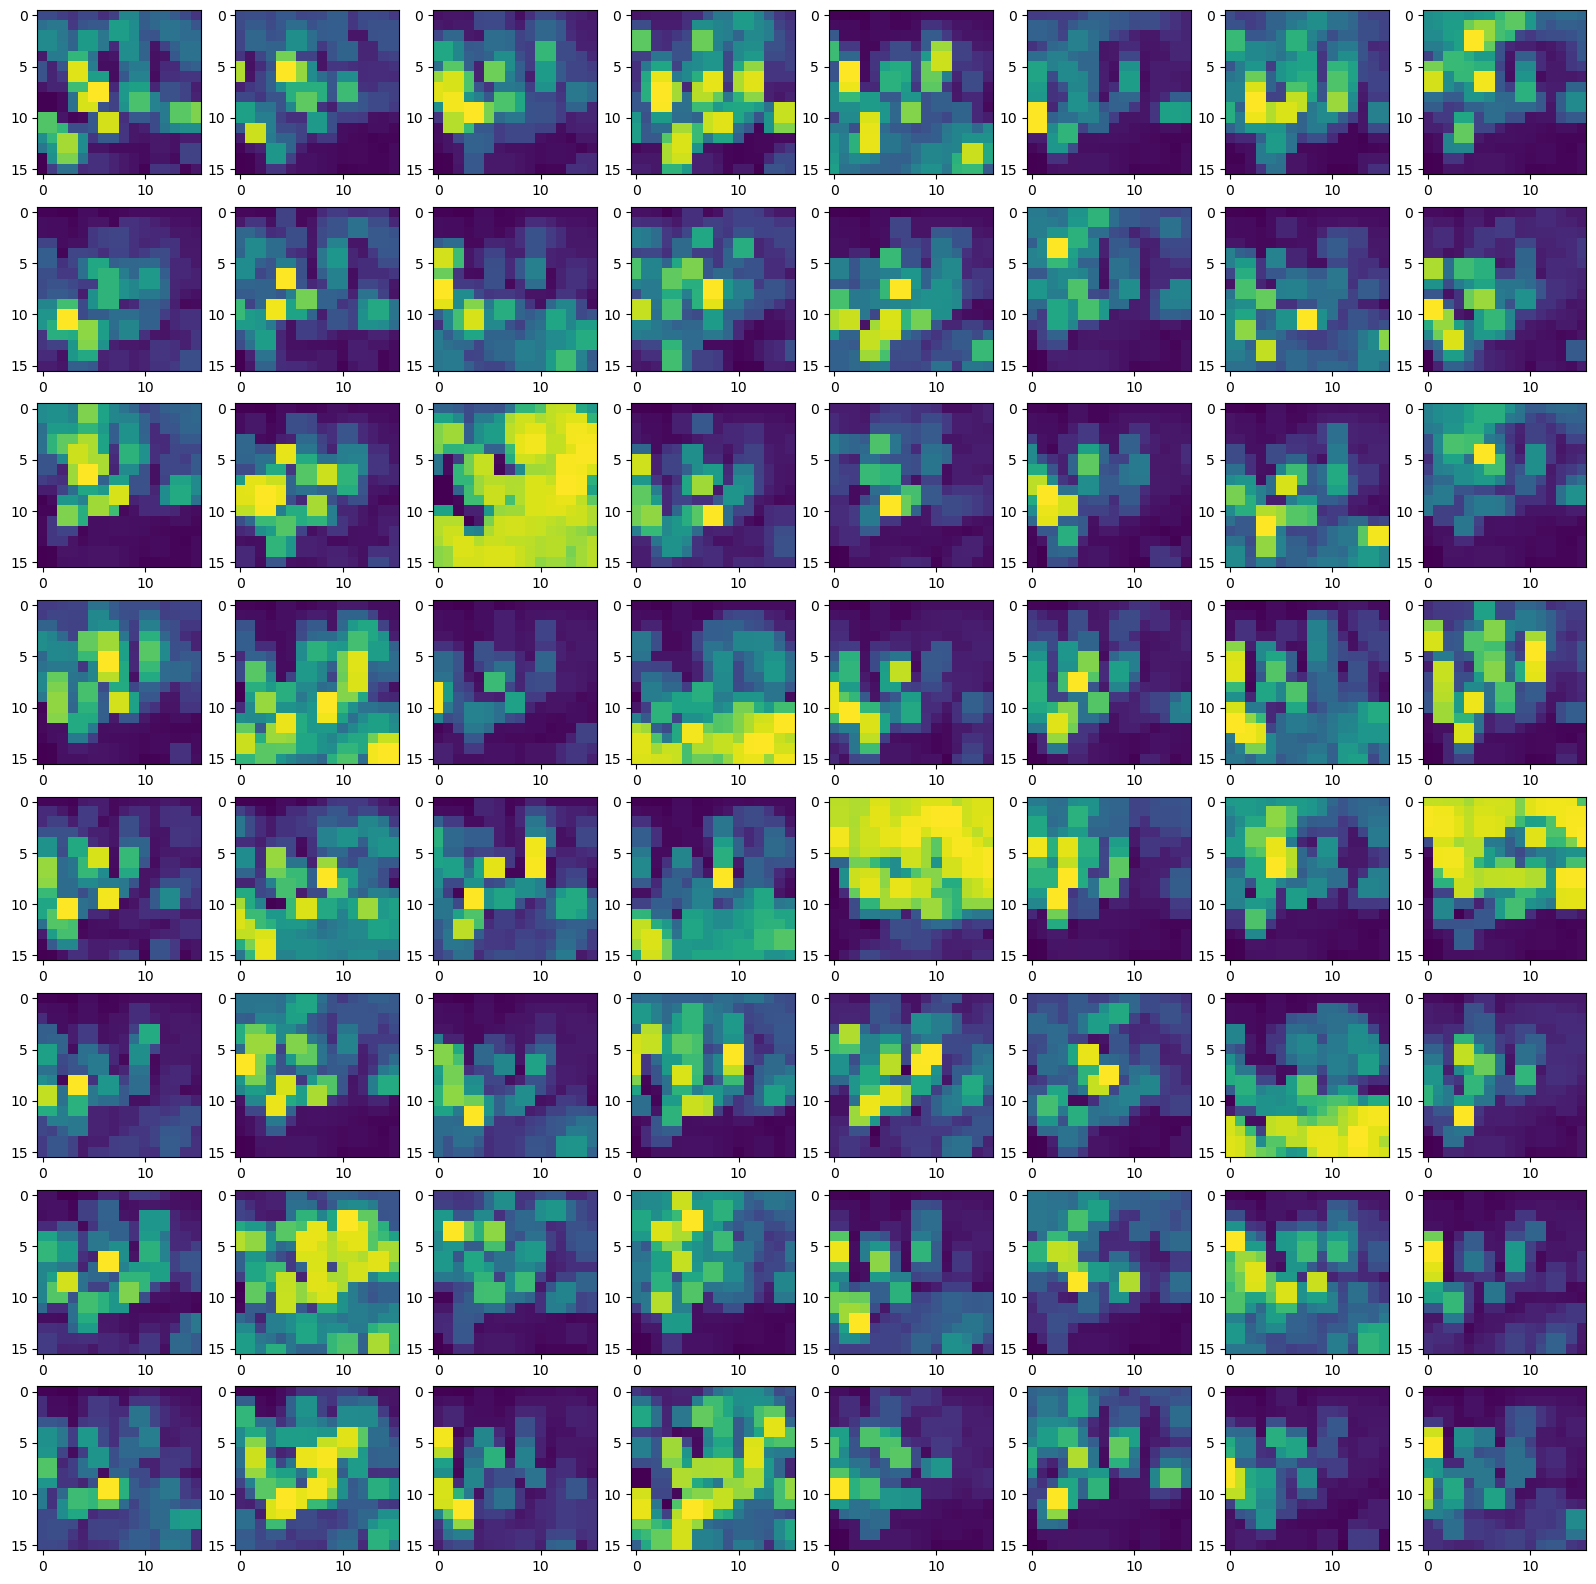

torch.Size([256, 8, 8])


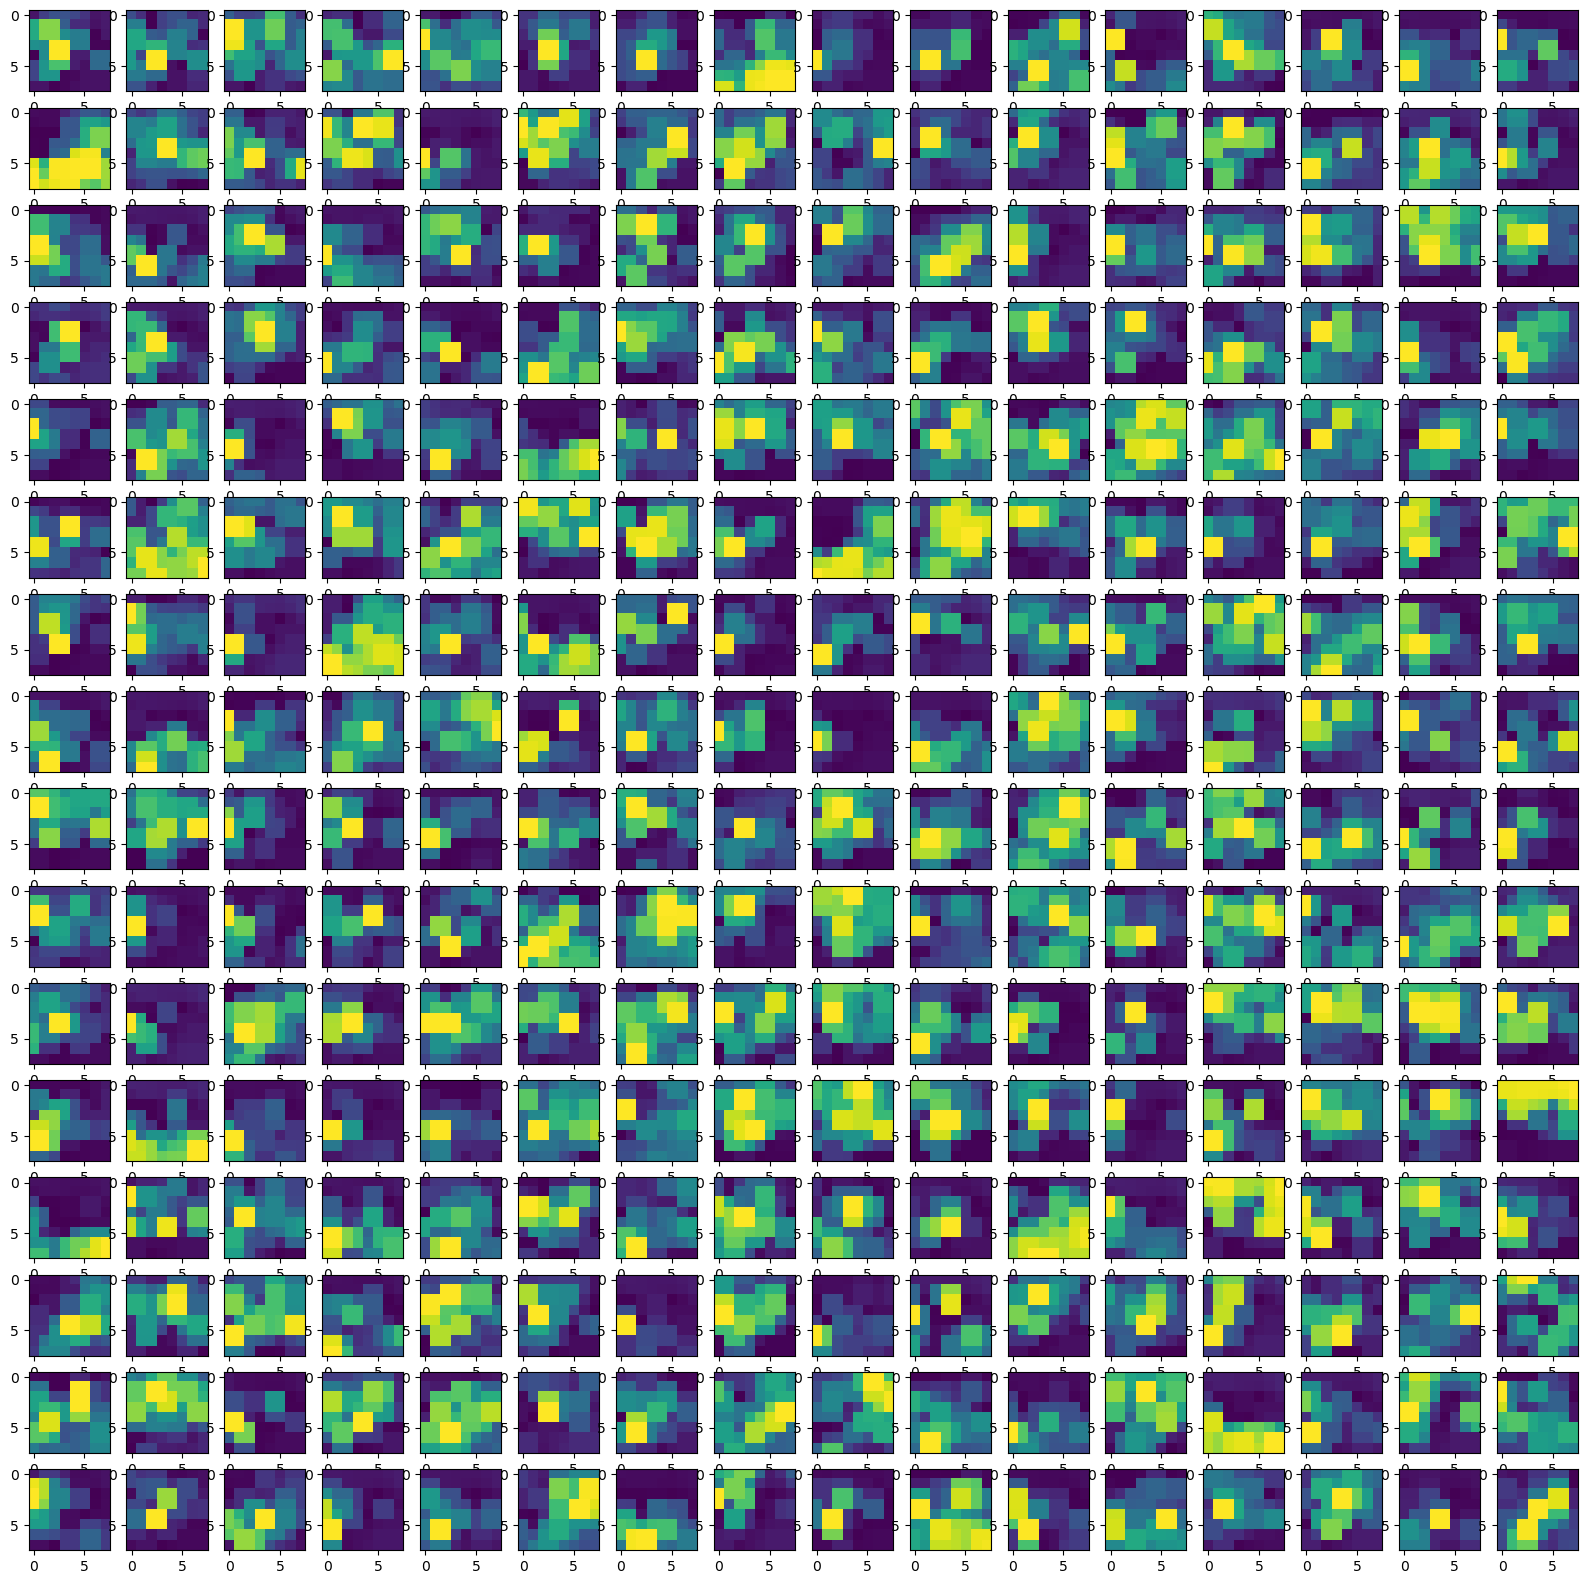

torch.Size([1024, 4, 4])


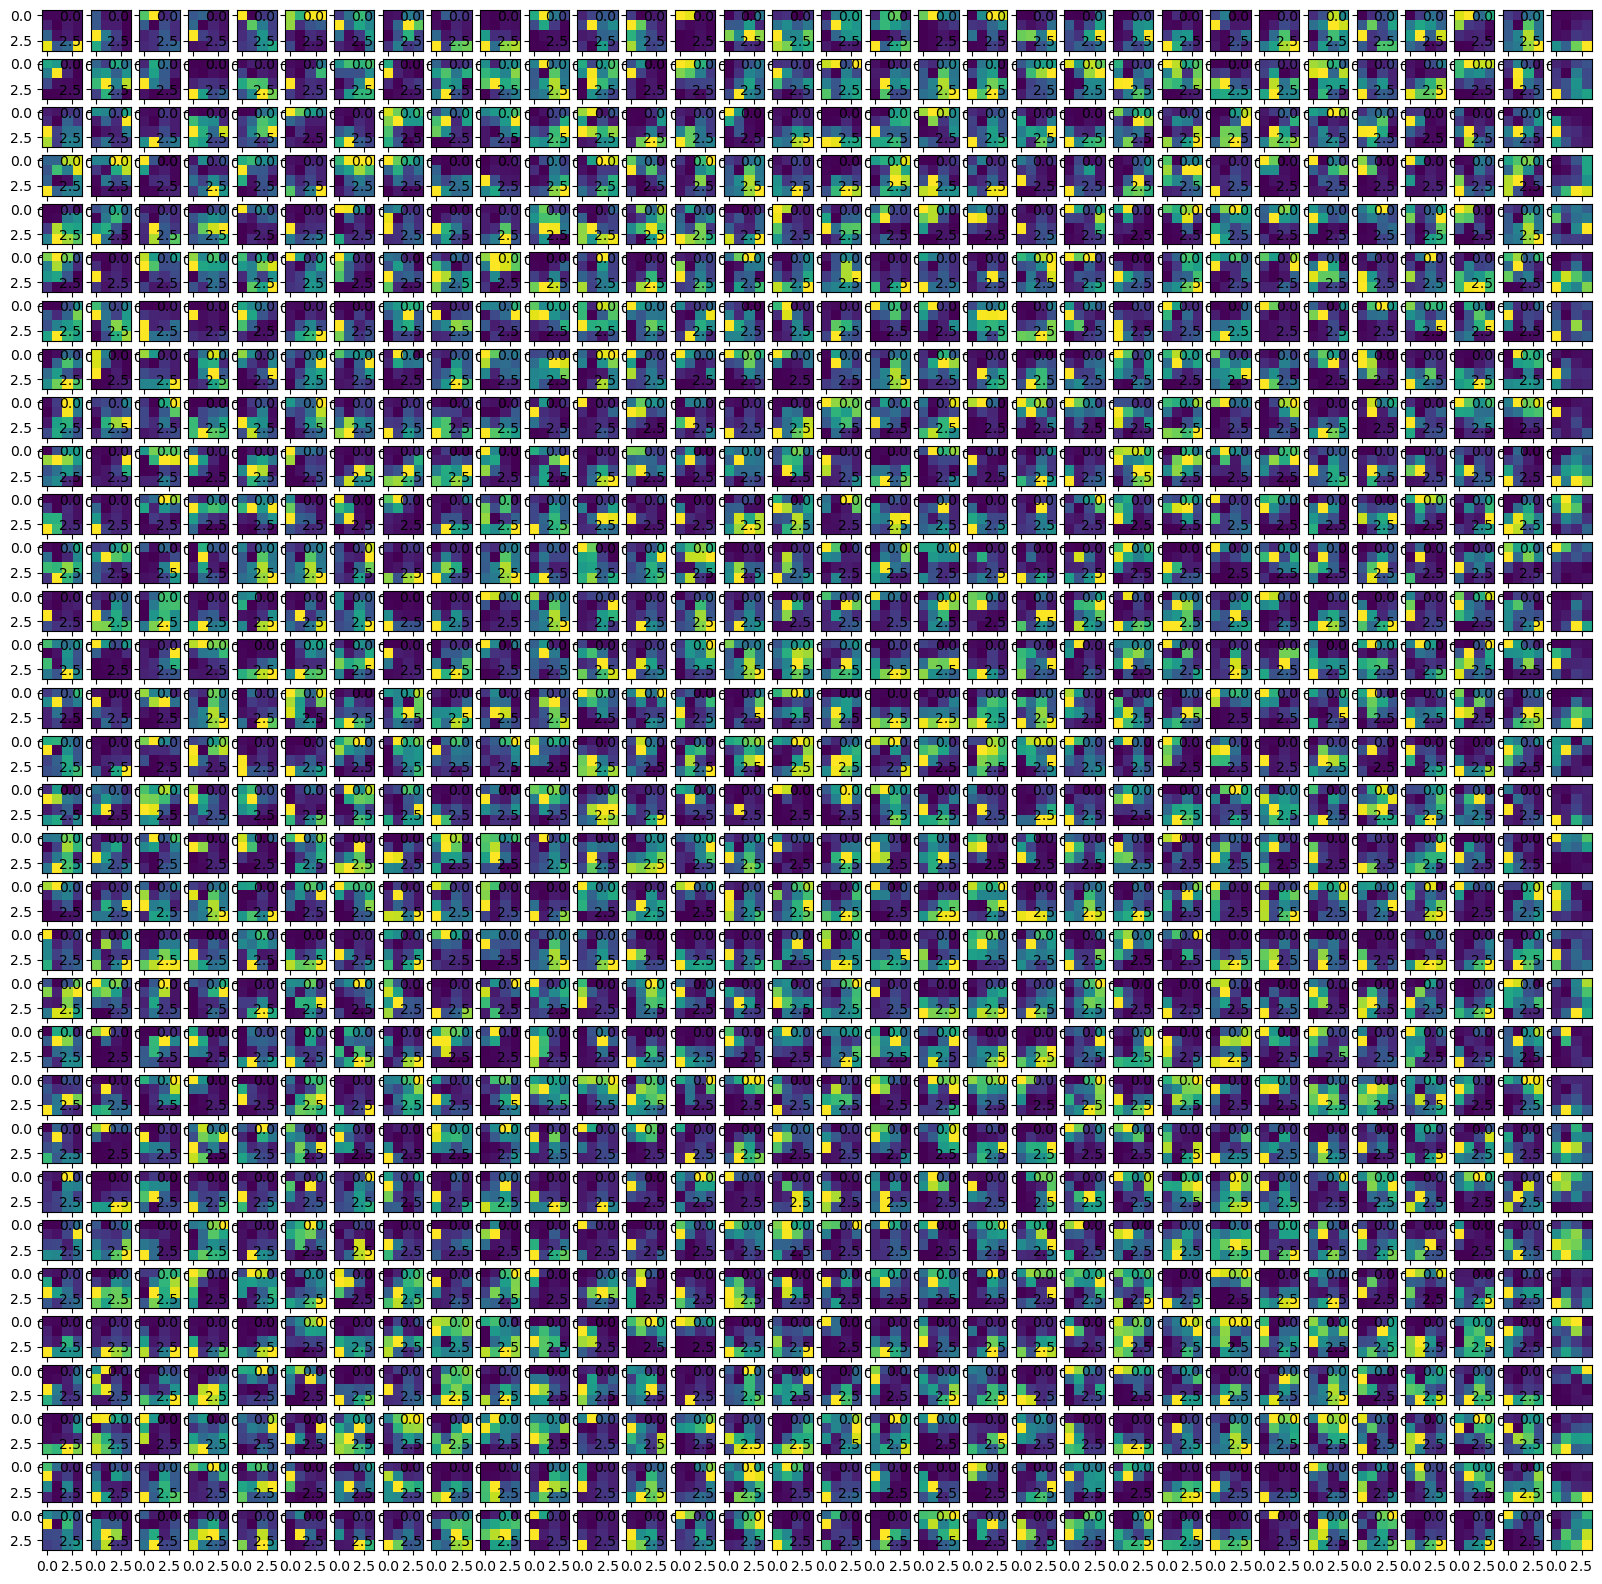

In [195]:
view(o1)
view(o2)
view(o3)